In [1]:
%matplotlib inline

we'll use the data of Boston housing prices which comes by default in scikit-learn.

The basic computation unit in TensorFlow is a graph. A TensorFlow project is typically structured into 2 parts:

* a construction phase where you design the computational graph, and
* an analysis phase where you run the graph and perform calculations on it.

In [2]:
import tensorflow as tf
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt

# Get the data
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston
total_features, total_prices = load_boston(True)     # return (data, target) : tuple if return_X_y is True
print(total_features.data.shape)
print(total_features)
print(total_features[0,:])
print(total_prices.data.shape)
print(total_prices)

(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
(506,)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 

In [9]:
file=load_boston(False)['filename']
print(file)
dataset = pd.read_csv(file,header=1)
dataset.head()

D:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

CRIM <class 'str'>


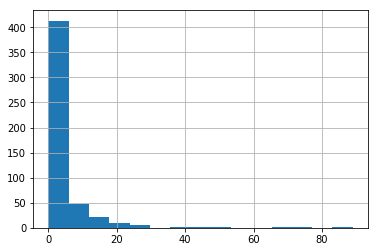

ZN <class 'str'>


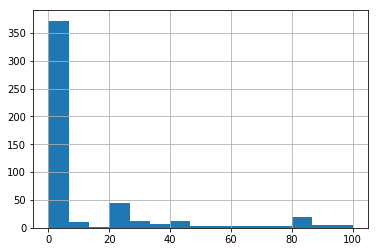

INDUS <class 'str'>


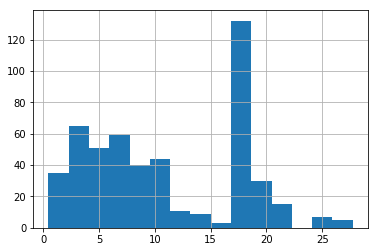

CHAS <class 'str'>


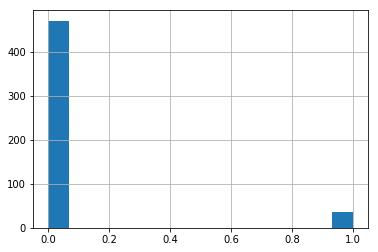

NOX <class 'str'>


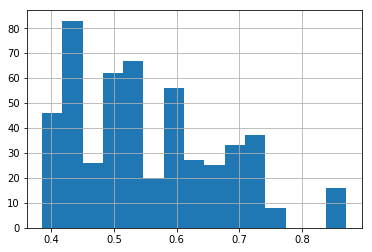

RM <class 'str'>


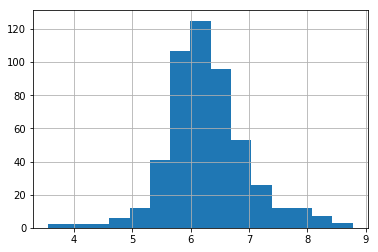

AGE <class 'str'>


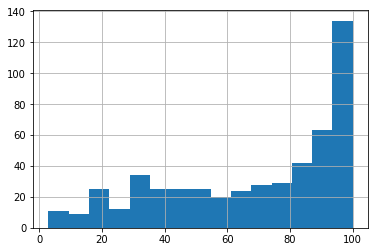

DIS <class 'str'>


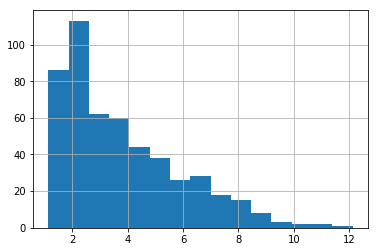

RAD <class 'str'>


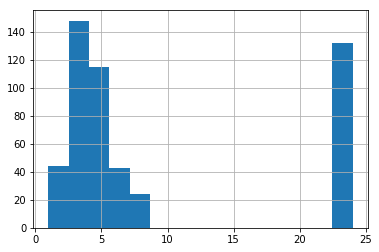

TAX <class 'str'>


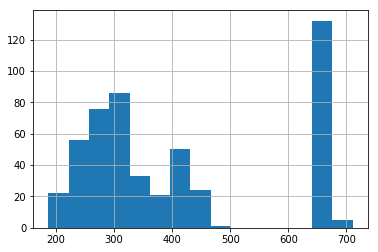

PTRATIO <class 'str'>


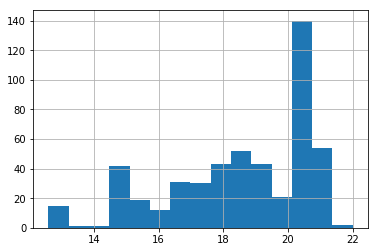

B <class 'str'>


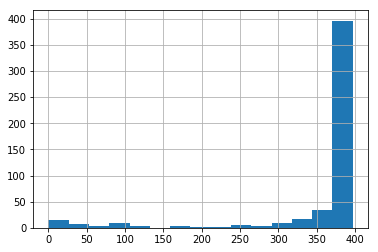

LSTAT <class 'str'>


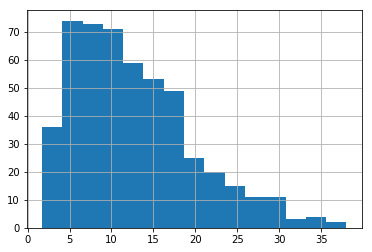

MEDV <class 'str'>


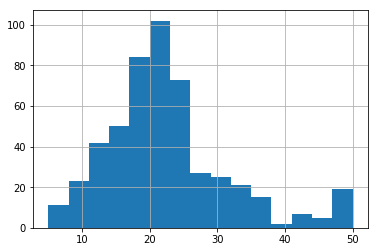

In [14]:
for item in dataset.columns:
    #print(item,type(item))
    dataset[item].hist(bins = 15)
    plt.show()

Standardization of datasets is a common requirement for many machine learning estimators.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

In [3]:
#https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

# Keep 300 samples for training
train_features = scale(total_features[:300])
train_prices = total_prices[:300]

print(train_features)

[[-0.64113113  0.10080399 -1.03067021 ... -1.00268807  0.42054571
  -0.92348369]
 [-0.60977124 -0.59350918 -0.28321604 ...  0.09274682  0.42054571
  -0.25234807]
 [-0.60980112 -0.59350918 -0.28321604 ...  0.09274682  0.32645614
  -1.07674783]
 ...
 [-0.43986906 -0.59350918  0.79242704 ... -0.6959663   0.42054571
   0.82856747]
 [-0.55396886  2.10659757 -1.04166218 ... -1.22177505 -0.24201132
  -0.925097  ]
 [-0.56748992  2.10659757 -1.04166218 ... -1.22177505 -0.16479777
  -0.96220305]]


In [4]:
# Keep 100 samples for validation
valid_features = scale(total_features[300:400])
valid_prices = total_prices[300:400]

# Keep remaining samples as test set
test_features = scale(total_features[400:])
test_prices = total_prices[400:]

$y*=f(x)=wx+b$

In [5]:
# https://www.tensorflow.org/api_docs/python/tf/random/truncated_normal

w = tf.Variable(tf.truncated_normal([13, 1], mean=0.0, stddev=1.0, dtype=tf.float64))

# https://www.tensorflow.org/api_docs/python/tf/zeros

b = tf.Variable(tf.zeros([1], dtype = tf.float64))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# https://www.tensorflow.org/api_docs/python/tf/math/add
# https://www.tensorflow.org/api_docs/python/tf/linalg/matmul
# https://www.tensorflow.org/api_docs/python/tf/math/square
# https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean

def calc(x, y):
    # Returns predictions and error
    predictions = tf.add(b, tf.matmul(x, w))
    error = tf.reduce_mean(tf.square(y - predictions))
    return [ predictions, error ]

y, lost = calc(train_features, train_prices)

In [7]:
# Feel free to tweak these 2 values:

learning_rate = 0.005

epochs = 3000

points = [[], []] # You'll see later why I need this

# https://www.tensorflow.org/api_docs/python/tf/initializers/global_variables
# https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer

init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(lost)

Python 語言提供了 with 這個獨特的語法，來幫助使用者管理使用的資源，像是開啟的檔案、網路 socket，包含tensorflow的session。

In [1]:

with tf.Session() as sess:

    sess.run(init)

    for i in list(range(epochs)):

        sess.run(optimizer)

        if i % 10 == 0:
            points[0].append(i+1)
            points[1].append(sess.run(lost))

        if i % 100 == 0:
            print(sess.run(lost))
    
    ax1=plt.subplot(221)
    ax2=plt.subplot(222)
    ax3=plt.subplot(212)
    plt.sca(ax1)
    plt.plot(calc(valid_features, valid_prices)[0], valid_prices, 'r--')
    plt.sca(ax2)
    plt.plot(calc(test_features, test_prices)[0], test_prices, 'r--')
    plt.sca(ax3)
    plt.plot(points[0], points[1], 'r--')
    plt.axis([0, epochs, 50, 600])
    plt.show()
    
    valid_lost = calc(valid_features, valid_prices)[1]

    print('Validation error =', sess.run(valid_lost), '\n')

    test_lost = calc(test_features, test_prices)[1]

    print('Test error =', sess.run(test_lost), '\n')

NameError: name 'tf' is not defined